In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings('ignore')

## CPUs based on the maximum number of channels in the CPU Exploratory Data Analysis

We are going to use regression analysis to estimate the performance of CPUs based on the maximum number of channels in the CPU. This data set comes from the UCI Machine Learning Repository.

The data file includes the following columns:

- *vendor*: vendor of the CPU
- *chmax*: maximum channels in the CPU
- *performance*: published relative performance of the CPU

a. Use a scatter plot to describe the relationship between CPU performance and the maximum number of channels.

Text(0, 0.5, 'published relative performance of the CPU')

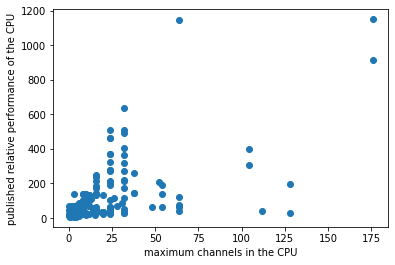

In [262]:
data = pd.read_csv("machine.csv")
plt.scatter(data["chmax"], data["performance"])
plt.xlabel("maximum channels in the CPU")
plt.ylabel("published relative performance of the CPU")


b. What is the value of the correlation coefficient between _performance_ and _chmax_?

In [263]:
corr = np.corrcoef(data["chmax"], data["performance"])
corr

array([[1.        , 0.60520929],
       [0.60520929, 1.        ]])

The data shows a strong correlation between performance and chmax with a correlation coefficient of 0.605. A simple linear regression model could be used since it is easy to interpret but we are likely going to want to attempt a Box-Cox transformation to reduce the heteroskedasticity.

## Fitting the Simple Linear Regression Model

In [264]:
model1 = ols("performance ~ chmax", data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           2.85e-22
Time:                        22:08:48   Log-Likelihood:                -1310.2
No. Observations:                 209   AIC:                             2624.
Df Residuals:                     207   BIC:                             2631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2252     10.859      3.428      0.0

## Checking the Assumptions of the Model

a. Scatterplot of the data with *chmax* on the x-axis and *performance* on the y-axis

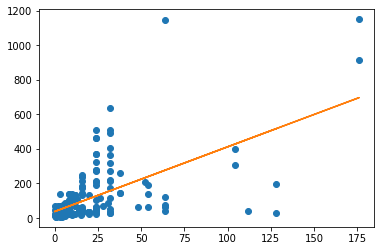

In [265]:
plt.plot(data["chmax"], data["performance"], "o")
m, b = np.polyfit(data["chmax"], data["performance"], 1)

plt.plot(data["chmax"], m * data["chmax"] + b)


**Model Assumption(s) it checks:**

The scatter plot of *chmax* and *performance* is used to check for linearity.

**Interpretation:**

It isn’t very clear if the data is linearly related. It is generally linear but there are some data points in the middle that make it a little more difficult to confirm.

b. Residual plot - a plot of the residuals, $\hat\epsilon_i$, versus the fitted values, $\hat{y}_i$

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'Residuals')]

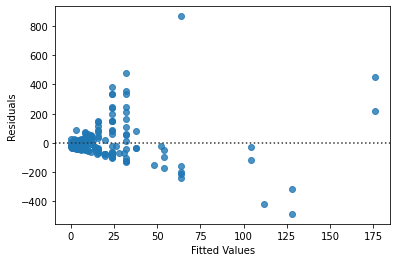

In [266]:
ax = sns.residplot(x="chmax", y="performance", data=data)
ax.set(xlabel="Fitted Values", ylabel="Residuals")

**Model Assumption(s) it checks:**

The Residuals versus fitted values plot is used to check constant variance.

**Interpretation:**

Although at first glance, there appear to be clusters at the lower ranges, this is a feature of the data set. Most of the data points have small predictor values, which is why most of the fitted values are at the lower range. The plot does show heteroscedasticity with variance increasing as the fitted values increase. This suggests that the constant variance assumption may not hold.


c. Histogram and q-q plot of the residuals

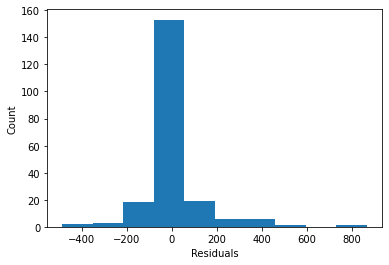

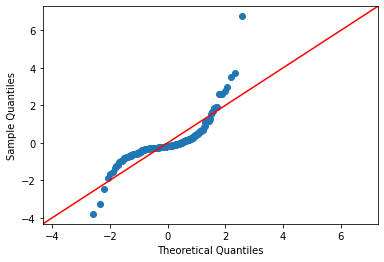

In [267]:
plt.hist(model1.resid)
plt.xlabel("Residuals")
plt.ylabel("Count")

sm.qqplot(model1.resid_pearson, line="45")
pylab.show()


**Model Assumption(s) it checks:**

The histogram and qq plot check for normality.

**Interpretation:**

It does not appear that the data is normal as it extends to each end.

## Improving the Fit

a. Use a Box-Cox transformation to find the optimal $\lambda$ value rounded to the nearest half integer.

In [268]:
y_fitted, best_lambda = stats.boxcox(data["performance"])
round(best_lambda * 0.5) / 0.5


0.0

With an optimal $\lambda$ of 0, this implies the BoxCox transformation recommended is a log(x).

b. Create a linear regression model, named *model2*, that uses the log transformed *performance* as the response, and the log transformed *chmax* as the predictor.

In [269]:
data["log_chmax"] = np.log(data["chmax"] + 1)
data["log_performance"] = np.log(data["performance"])

model2 = ols("log_performance ~ log_chmax", data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_performance   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.57e-25
Time:                        22:08:49   Log-Likelihood:                -250.74
No. Observations:                 209   AIC:                             505.5
Df Residuals:                     207   BIC:                             512.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4765      0.142     17.499      0.000       2.198       2.756
log_chmax      0.6482      0.054     12.001      0.000       0.542       0.755
==============================================================================
Omnibus:                        3.484   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.324
Skew:                           0.011   Prob(JB):                        0.313
Kurtosis:                       2.484   Cond. No.                         7.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. Compare the R-squared values of *model1* and *model2*.  Comparing model1 to model2 the $R^2$ value increased from 0.366 to 0.41. This indicates that the explanatory power of the model did increase.

The log transformed model greatly improves the linearity/mean zero assumption.

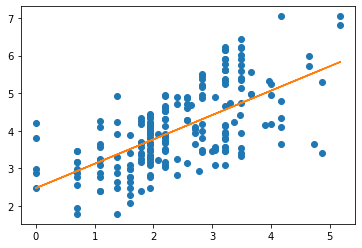

In [270]:
plt.plot(data["log_chmax"], data["log_performance"], "o")
m, b = np.polyfit(data["log_chmax"], data["log_performance"], 1)

plt.plot(data["log_chmax"], m * data["log_chmax"] + b)


There appears to be homoskedasticity in the residual plot. This suggests that the constant variance assumption holds.

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'Residuals')]

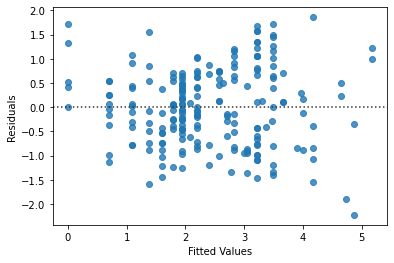

In [271]:
ax = sns.residplot(x="log_chmax", y="log_performance", data=data)
ax.set(xlabel="Fitted Values", ylabel="Residuals")

Both the histogram and the quantile-quantile plot of the residuals suggests that the normality assumption holds. All model assumptions appear to hold using the log-transformed data.

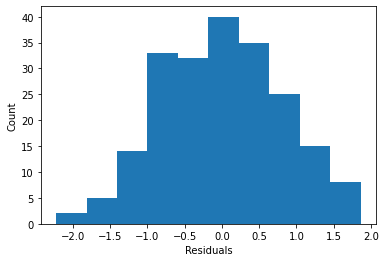

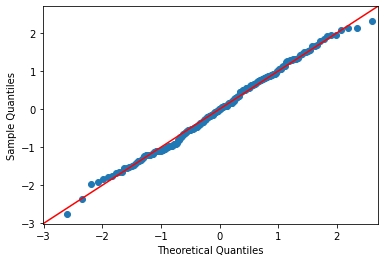

In [272]:
plt.hist(model2.resid)
plt.xlabel("Residuals")
plt.ylabel("Count")

sm.qqplot(model2.resid_pearson, line="45")
pylab.show()

## Prediction

Suppose we are interested in predicting CPU performance when `chmax = 128`.  Make a prediction using both *model1* and *model2* and provide the 95% prediction interval of each prediction on the original scale of the response, *performance*.

In [273]:
model1.get_prediction(exog=dict(chmax=128)).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,516.468519,38.595926,440.377021,592.560016,252.251931,780.685107


In [274]:
model2.get_prediction(exog=dict(log_chmax=np.log(128))).summary_frame(
    alpha=0.05
).applymap(lambda x: np.exp(x))


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,276.32558,1.154116,208.303548,366.560371,54.908774,1390.594264


When there are a maximum of 128 channels in CPU, model1 predicts a CPU performance of 516.4685 with a lower bound of 252 and an upper bound of 781 for the 95% prediction interval, while model2 predicts a CPU performance of 276.326 with a lower bound of 55 and an upper bound of 1391 for the 95% prediction interval.

Based on the goodness of fit assessments, model1’s prediction interval is likely to be inaccurate. Hence, model2’s prediction interval seems to be much more reliable than model1’s.

# Part C. ANOVA

There are over 20 vendors in the data set.  To simplify the task, we are going to limit our analysis to three vendors, specifically, honeywell, hp, and nas.

In [275]:
# Filter for honeywell, hp, and nas
data2 = data.query("vendor in ('honeywell', 'hp', 'nas')")
data2.loc[:, "vendor"] = data2["vendor"].astype("category")


1. Create a boxplot of *performance* and *vendor*, with *performance* on the vertical axis. 

<AxesSubplot: title={'center': 'performance'}, xlabel='[vendor]'>

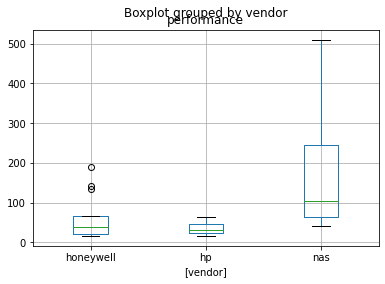

In [276]:
data2[["vendor", "performance"]].boxplot(by="vendor")

There is not much variation in performance from HP and Honeywell in comparison to NAS. The best HP and Honeywell CPUs are in the bottom quartile of NAS. Honeywell and NAS have a few CPUs that are far greater than the 3rd quartile group.

2. Perform an ANOVA F-test on the means of the three vendors.  Using an $\alpha$-level of 0.05, can we reject the null hypothesis that the means of the three vendors are equal?

In [277]:
aov = sm.stats.anova_lm(ols("performance ~ vendor", data=data2).fit(), typ=2)
aov

,sum_sq,df,F,PR(>F)
vendor,154493.624446,2.0,6.026501,0.005527
Residual,461442.734529,36.0,NaN,NaN


Since the p-value is less than 0.05 we can reject the null hypothesis and conclude that there are significant differences between the vendors.

3. Perform a Tukey pairwise comparison between the three vendors. Using an $\alpha$-level of 0.05.

In [278]:
comparison = multi.MultiComparison(data2["performance"], data2["vendor"])
results = comparison.tukeyhsd()
print(results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1  group2 meandiff p-adj    lower    upper   reject
----------------------------------------------------------
honeywell     hp  -24.033 0.8935 -153.7676 105.7017  False
honeywell    nas 116.4332 0.0189   16.8266 216.0398   True
       hp    nas 140.4662 0.0214   18.1109 262.8214   True
----------------------------------------------------------


Nas-honeywell and nas-hp are the two pairs of vendors that have statistically significantly different means at the significance level of 0.05 since the p-values of the pairwise comparisons are smaller than the α-level of 0.05; In fact, the intervals fall completely on the positive side and don’t include zero. In the context of the problem, we can conclude that the mean CPU performance of nas is significantly higher than the mean CPU performance of the other two vendors honeywell and hp.